In [ ]:
# loading modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc

In [ ]:
# loading dhe data
Brain = pd.read_csv("Birds includes whole brain data 03 03 2024.csv")
# Brain = Brain.drop(['Unnamed: 0'], axis=1)
Brain.head(85)

,Animal,Order,Family,Forebrain m,Cerebellum m,Whole brain m,Forebrain n,Cerebellum n,Whole brain n,Body m
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Namaqua dove,Columbiformes,Columbidae,0.240,0.0870,0.555,"14,167,000","59,533,000","94,490,000",31.850
2,Common ground dove,Columbiformes,Columbidae,0.246,0.0750,0.572,"17,602,000","51,380,000","89,630,000",35.277
3,Diamond dove,Columbiformes,Columbidae,0.240,0.0776,0.545,"18,209,000","54,101,000","87,879,000",39.930
4,King quail,Galliformes,Phasianidae,0.220,0.0717,0.521,"20,523,000","42,945,000","80,478,000",43.810
...,...,...,...,...,...,...,...,...,...,...
80,Monk parakeet,Psittaciformes,Psittacidae,2.240,0.2810,3.420,"396,000,000","195,000,000","696,765,000",81.700
81,Peregrine falcon,Falconiformes,Falconidae,3.787,1.0620,6.776,"396,060,000","548,548,000","1,060,000,000",672.800
82,Black vulture,Accipitriformes,Cathartidae,5.930,1.3985,9.967,"398,899,000","512,097,000","1,009,000,000",1747.000
83,Azure-winged magpie,Passeriformes,Corvidae,2.218,0.2710,3.393,"399,695,000","243,490,000","740,589,000",84.110


In [ ]:
# Dropping NaN values
Brain = Brain.dropna().reset_index(drop=True)

In [ ]:
# Converting into float and removing commas
if Brain['Forebrain n'].dtype != 'float64':
     Brain['Forebrain n'] = Brain['Forebrain n'].str.replace(',', '').astype(float)
if Brain['Cerebellum n'].dtype != 'float64':
     Brain['Cerebellum n'] = Brain['Cerebellum n'].str.replace(',', '').astype(float)
if Brain['Whole brain n'].dtype != 'float64':
     Brain['Whole brain n'] = Brain['Whole brain n'].str.replace(',', '').astype(float)

In [ ]:
Brain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Animal         110 non-null    object 
 1   Order          110 non-null    object 
 2   Family         110 non-null    object 
 3   Forebrain m    110 non-null    float64
 4   Cerebellum m   110 non-null    float64
 5   Whole brain m  110 non-null    float64
 6   Forebrain n    110 non-null    float64
 7   Cerebellum n   110 non-null    float64
 8   Whole brain n  110 non-null    float64
 9   Body m         110 non-null    float64
dtypes: float64(7), object(3)
memory usage: 8.7+ KB


In [ ]:
# Getting relative cortical and cerebellar masses and relative number of neurons in each structure
Brain['Forebrain m r %'] = Brain['Forebrain m']/Brain['Whole brain m']*100
Brain['Cerebellum m r %'] = Brain['Cerebellum m']/Brain['Whole brain m']*100
Brain['Forebrain n r %'] = Brain['Forebrain n']/Brain['Whole brain n']*100
Brain['Cerebellum n r %'] = Brain['Cerebellum n']/Brain['Whole brain n']*100

In [ ]:
# Getting neuron densities in a miligram of structure
Brain['Forebrain n d'] = Brain['Forebrain n']/(Brain['Forebrain m']*1000)
Brain['Cerebellum n d'] = Brain['Cerebellum n']/(Brain['Cerebellum m']*1000)
Brain['Whole brain n d'] = Brain['Whole brain n']/(Brain['Whole brain m']*1000)

In [ ]:
# Brain mass per body mass
Brain['Forebrain m per body m'] = Brain['Forebrain m']/Brain['Body m']*100
Brain['Cerebellum m per body m'] = Brain['Cerebellum m']/Brain['Body m']*100
Brain['Whole brain m per body m'] = Brain['Whole brain m']/Brain['Body m']*100

In [ ]:
# Number of neurons per body mass
Brain['Forebrain n per body m'] = Brain['Forebrain n']/Brain['Body m']
Brain['Cerebellum n per body m'] = Brain['Cerebellum n']/Brain['Body m']
Brain['Whole brain n per body m'] = Brain['Whole brain n']/Brain['Body m']

In [ ]:
Breng = Brain
Breng.head()

,Animal,Order,Family,Forebrain m,Cerebellum m,Whole brain m,Forebrain n,Cerebellum n,Whole brain n,Body m,...,Cerebellum n r %,Forebrain n d,Cerebellum n d,Whole brain n d,Forebrain m per body m,Cerebellum m per body m,Whole brain m per body m,Forebrain n per body m,Cerebellum n per body m,Whole brain n per body m
0,Namaqua dove,Columbiformes,Columbidae,0.240,0.0870,0.555,14167000.0,59533000.0,94490000.0,31.850,...,63.004551,59029.166667,684287.356322,170252.252252,0.753532,0.273155,1.742543,444803.767661,1.869168e+06,2.966719e+06
1,Common ground dove,Columbiformes,Columbidae,0.246,0.0750,0.572,17602000.0,51380000.0,89630000.0,35.277,...,57.324557,71552.845528,685066.666667,156695.804196,0.697338,0.212603,1.621453,498965.331519,1.456473e+06,2.540749e+06
2,Diamond dove,Columbiformes,Columbidae,0.240,0.0776,0.545,18209000.0,54101000.0,87879000.0,39.930,...,61.563058,75870.833333,697177.835052,161245.871560,0.601052,0.194340,1.364889,456023.040321,1.354896e+06,2.200826e+06
3,King quail,Galliformes,Phasianidae,0.220,0.0717,0.521,20523000.0,42945000.0,80478000.0,43.810,...,53.362410,93286.363636,598953.974895,154468.330134,0.502168,0.163661,1.189226,468454.690710,9.802556e+05,1.836978e+06
4,Common quail,Galliformes,Phasianidae,0.360,0.1090,0.787,22568000.0,75198000.0,117760000.0,94.860,...,63.856997,62688.888889,689889.908257,149631.512071,0.379507,0.114906,0.829644,237908.496732,7.927261e+05,1.241408e+06


In [ ]:
Breng.describe()

,Forebrain m,Cerebellum m,Whole brain m,Forebrain n,Cerebellum n,Whole brain n,Body m,Forebrain m r %,Cerebellum m r %,Forebrain n r %,Cerebellum n r %,Forebrain n d,Cerebellum n d,Whole brain n d,Forebrain m per body m,Cerebellum m per body m,Whole brain m per body m,Forebrain n per body m,Cerebellum n per body m,Whole brain n per body m
count,110.000000,110.000000,110.000000,1.100000e+02,1.100000e+02,1.100000e+02,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,1.100000e+02,110.000000,110.000000,110.000000,110.000000,1.100000e+02,1.100000e+02,1.100000e+02
mean,3.557691,0.666899,5.759718,3.189665e+08,2.922348e+08,6.905940e+08,2601.683545,57.590427,12.020205,38.218619,48.776870,97123.678048,5.541703e+05,142173.419206,0.819102,0.144682,1.361209,1.186260e+06,1.020551e+06,2.577148e+06
std,3.852669,0.745945,5.784788,3.752325e+08,2.012968e+08,5.753056e+08,12298.823675,8.824361,2.774180,15.772048,14.307112,63166.520518,2.198083e+05,62050.833780,0.813018,0.122677,1.284828,1.759332e+06,1.476740e+06,3.775590e+06
min,0.176000,0.040000,0.357000,1.416700e+07,4.294500e+07,8.047800e+07,5.600000,42.226488,6.005789,14.993121,17.521696,18741.594996,1.826565e+05,40473.055231,0.021308,0.004832,0.033527,3.993419e+03,8.826089e+03,1.356935e+04
25%,1.064000,0.238950,1.957000,7.306950e+07,1.349340e+08,2.820318e+08,164.190000,49.496757,9.843060,25.545220,39.030673,50226.405405,4.042487e+05,97408.521147,0.256076,0.062532,0.466985,1.143920e+05,2.615935e+05,4.937258e+05
50%,2.253000,0.469800,3.862500,1.549625e+08,2.321540e+08,4.826050e+08,459.033500,58.310245,12.849825,35.154081,51.685447,75485.283096,5.180430e+05,132664.834600,0.452680,0.102310,0.790020,2.948621e+05,5.186645e+05,1.015399e+06
75%,4.206250,0.849725,7.343500,3.994960e+08,4.111295e+08,9.572640e+08,1025.825000,63.396266,14.030734,47.538337,60.447717,133857.739159,6.494055e+05,174995.927301,1.158817,0.195841,1.820029,1.778499e+06,1.311652e+06,3.423526e+06
max,25.580000,5.800900,40.249000,1.916000e+09,1.059572e+09,3.136000e+09,120050.000000,76.332637,17.506389,76.491228,72.386671,363636.363636,1.650000e+06,459030.812325,3.288690,0.714286,6.375000,1.142857e+07,1.178571e+07,2.926321e+07


In [ ]:
Breng.shape

(110, 23)

In [ ]:
# pd.set_option('display.max_rows', 170)
# Breng.head(170)

In [ ]:
X00 = Breng['Forebrain m']
Y00 = Breng["Forebrain n"]

In [ ]:
# The correlation between Forebrain mass and number of neurons
r0 = np.corrcoef(X00, Y00)
r0

array([[1.        , 0.66379538],
       [0.66379538, 1.        ]])

In [ ]:
X01 = Breng['Cerebellum m']
Y01 = Breng["Cerebellum n"]

In [ ]:
# The same for cerebellum
r1 = np.corrcoef(X01, Y01)
r1

array([[1.        , 0.83897337],
       [0.83897337, 1.        ]])

In [ ]:
X02 = Breng['Forebrain m r %']
Y02 = Breng["Forebrain n r %"]

In [ ]:
# The correlation between relative cortical mass and relative number of neurons
r2 = np.corrcoef(X02, Y02)
r2

array([[1.        , 0.89103308],
       [0.89103308, 1.        ]])

In [ ]:
X03 = Breng['Cerebellum m r %']
Y03 = Breng["Cerebellum n r %"]

In [ ]:
# Same as above for cerebellum
r3 = np.corrcoef(X03, Y03)
r3

array([[1.        , 0.88202685],
       [0.88202685, 1.        ]])

In [ ]:
Y04 = Breng["Body m"]

In [ ]:
# Correlation between body mass and number of neurons in the cortex
r4 = np.corrcoef(Y00, Y04)
r4

array([[1.       , 0.0580945],
       [0.0580945, 1.       ]])

In [ ]:
x05 = Breng['Forebrain n d']

[Text(0.5, 1.0, 'Frequency Histogram'), Text(0, 0.5, 'Frequency')]

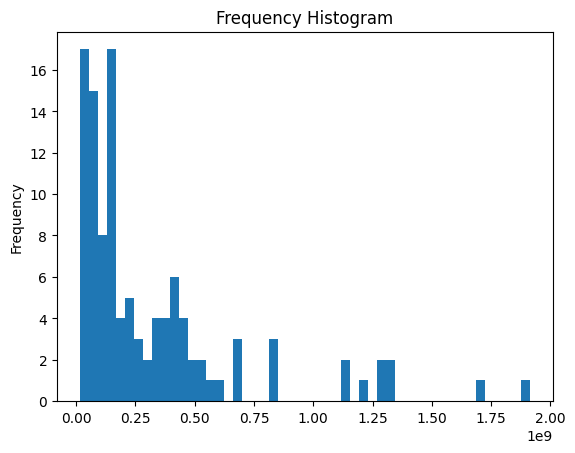

In [ ]:
plt.hist(Y00, bins=50)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')

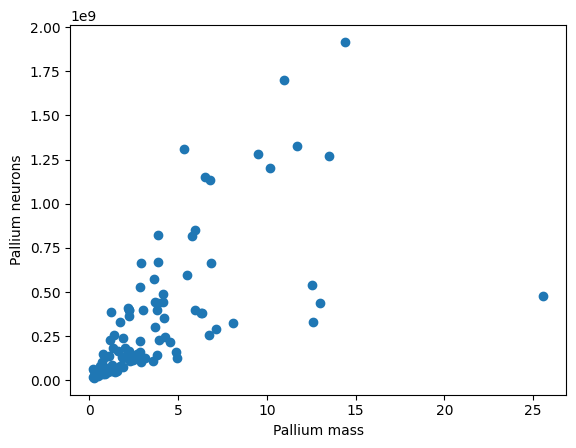

In [ ]:
plt.scatter(X00, Y00)
plt.xlabel('Pallium mass')
plt.ylabel('Pallium neurons')
plt.show()

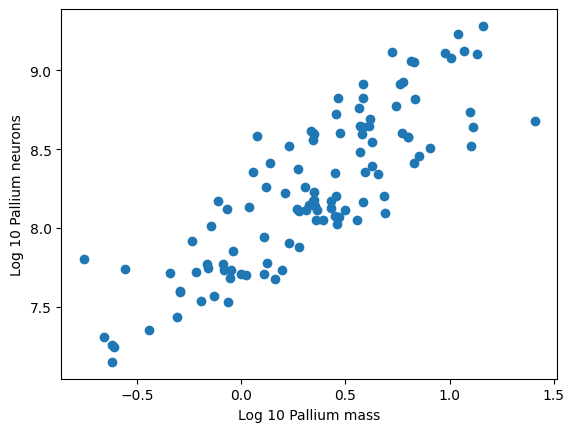

In [ ]:
plt.scatter(np.log10(X00), np.log10(Y00))
plt.xlabel('Log 10 Pallium mass')
plt.ylabel('Log 10 Pallium neurons')
plt.show()

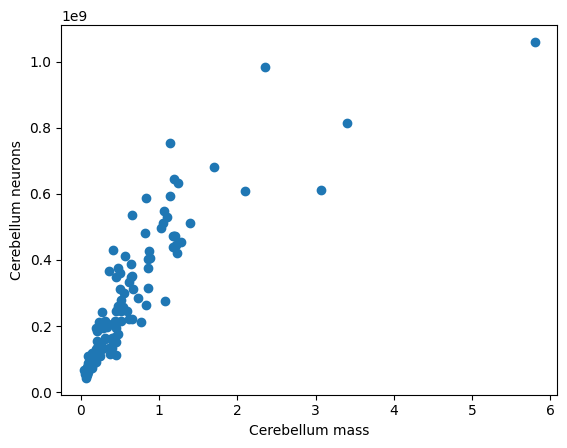

In [ ]:
plt.scatter(X01, Y01)
plt.xlabel('Cerebellum mass')
plt.ylabel('Cerebellum neurons')
plt.show()

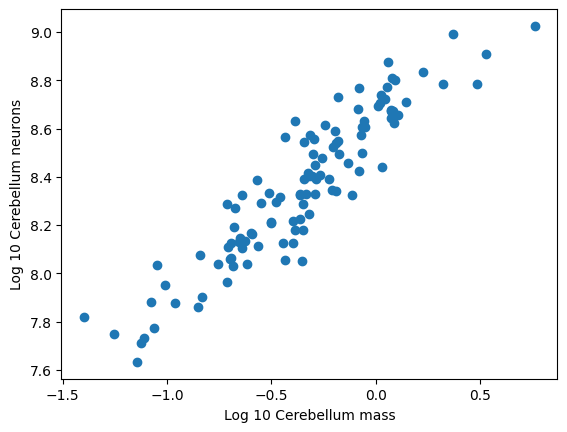

In [ ]:
plt.scatter(np.log10(X01), np.log10(Y01))
plt.xlabel('Log 10 Cerebellum mass')
plt.ylabel('Log 10 Cerebellum neurons')
plt.show()

<Axes: xlabel='Forebrain m', ylabel='Forebrain n'>

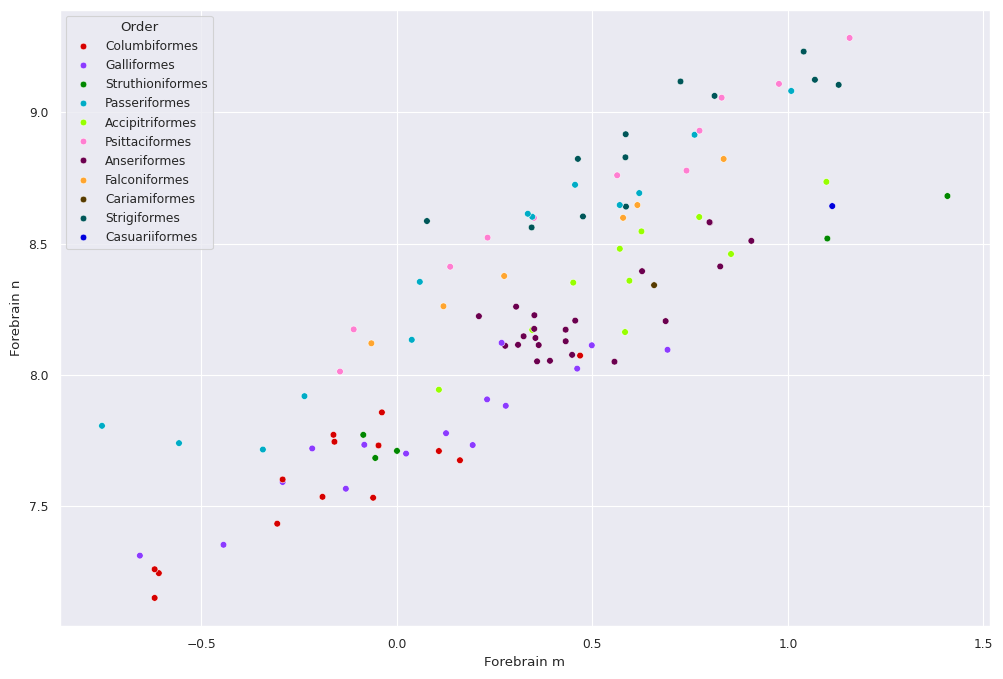

In [ ]:
sns.set("paper", rc={"figure.figsize": (12, 8)})
palette = sns.color_palette(cc.glasbey, n_colors=11)
sns.scatterplot(data=Breng, x=np.log10(X00), y=np.log10(Y00), hue='Order', palette=palette)

<Axes: xlabel='Forebrain m', ylabel='Forebrain n d'>

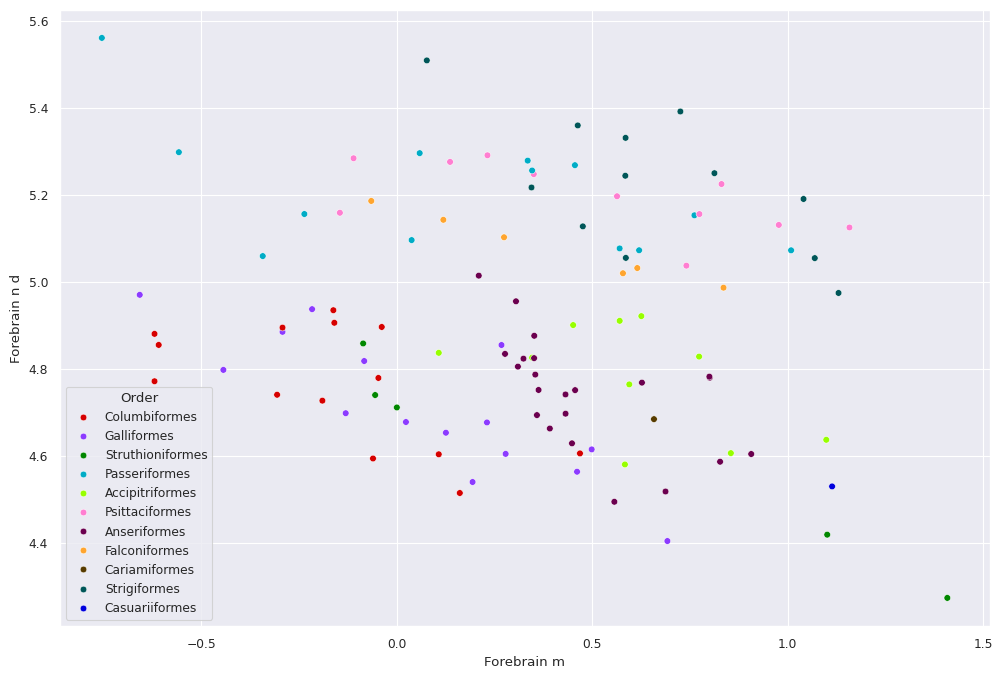

In [ ]:
sns.scatterplot(data=Breng, x=np.log10(X00), y=np.log10(x05), hue='Order', palette=palette)

In [ ]:
# Saving modified data
Breng.to_csv('/content/birds with feature engineering 04 03 2024 .csv')

<Axes: xlabel='Forebrain m', ylabel='Forebrain n d'>

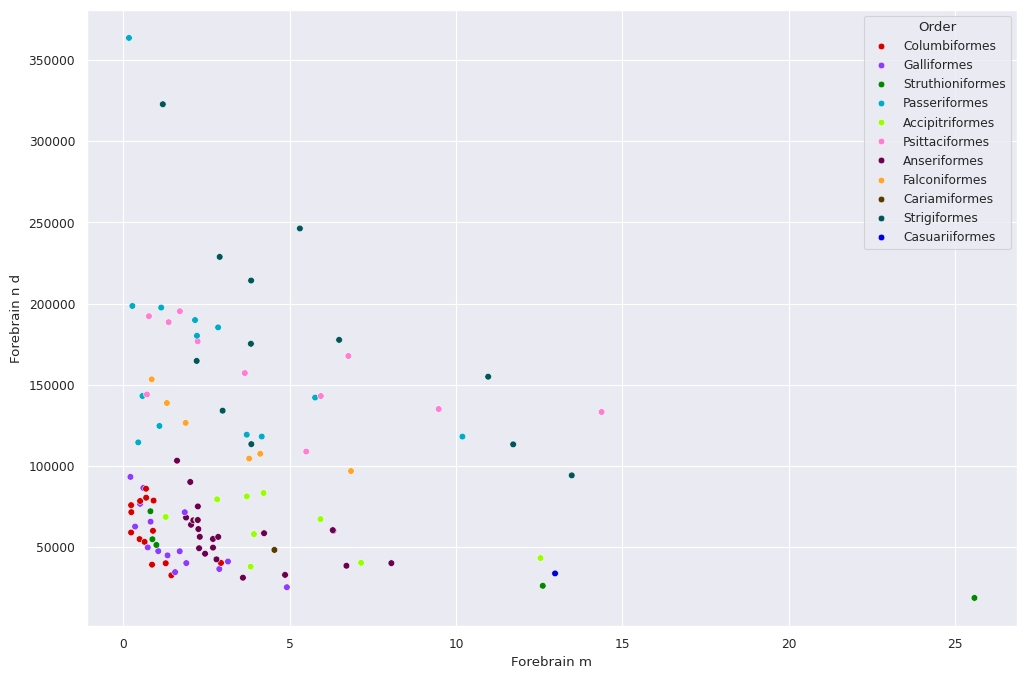

In [ ]:
sns.scatterplot(data=Breng, x=X00, y=x05, hue='Order', palette=palette)

<Axes: xlabel='Order', ylabel='Count'>

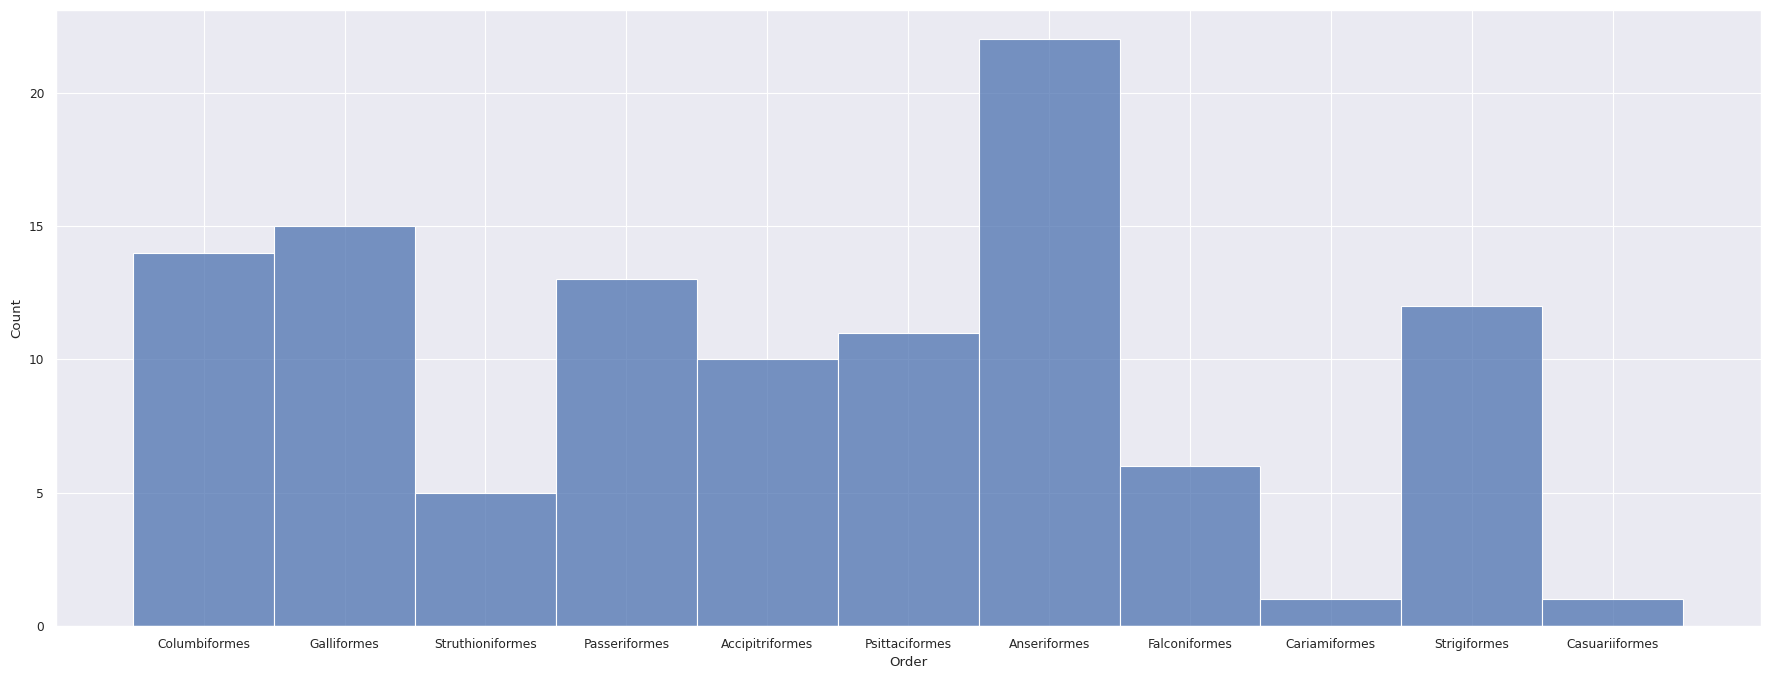

In [ ]:
sns.set("paper", rc={"figure.figsize": (22, 8)})
sns.histplot(data=Breng, x="Order")

In [ ]:
matrix = Breng.corr(numeric_only=True)

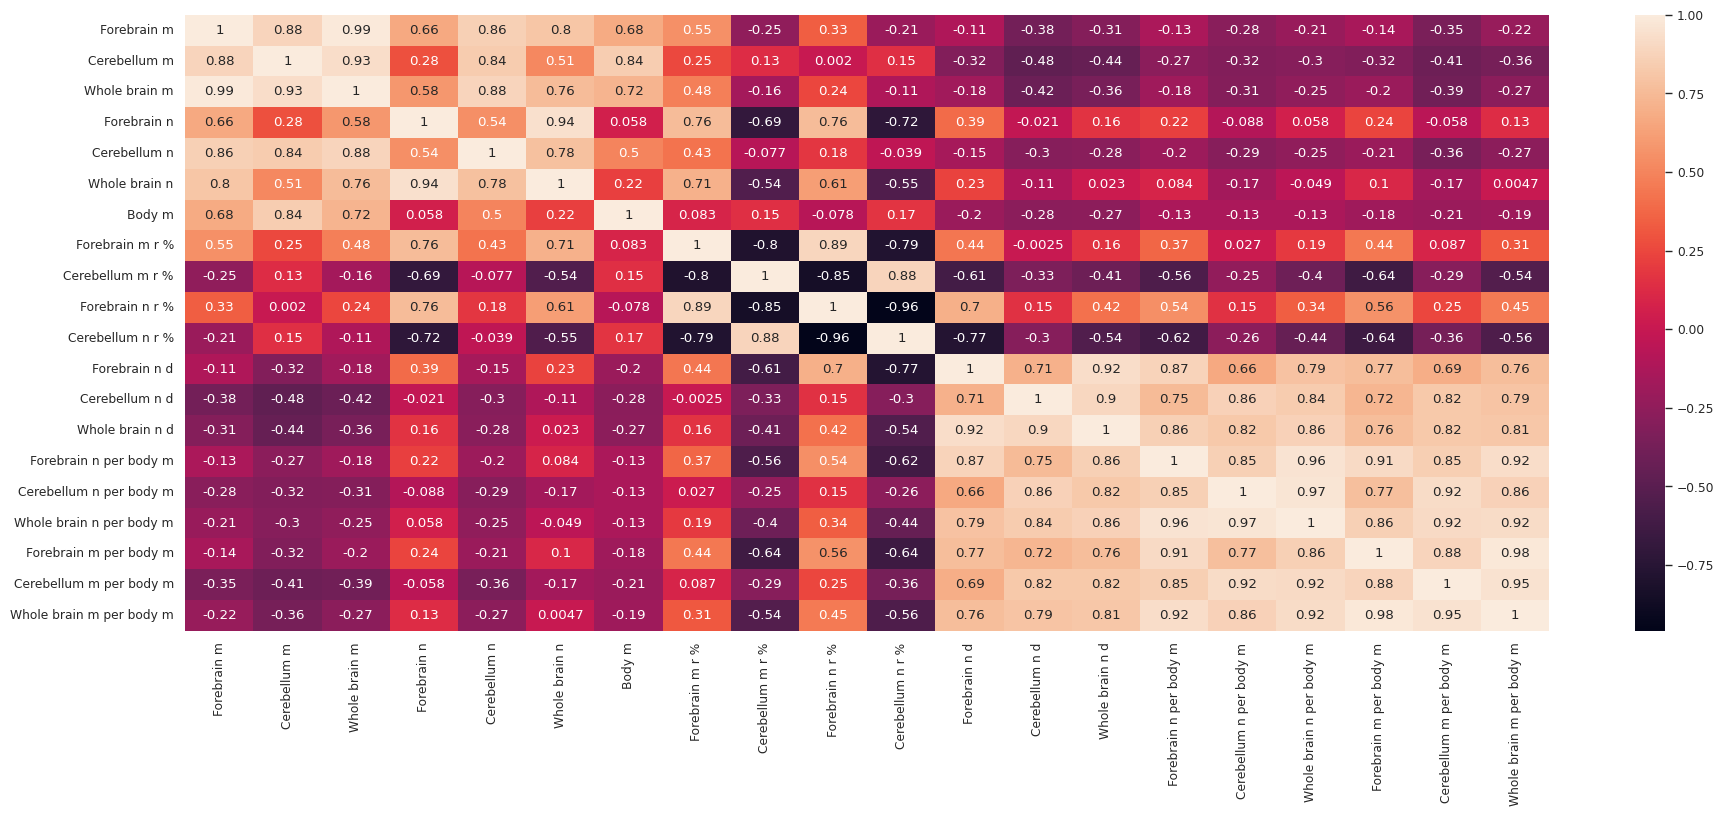

In [ ]:
sns.heatmap(matrix, annot=True);